## Q1. What is the mathematical formula for a linear SVM?

The mathematical formulation for a linear Support Vector Machine (SVM) involves finding the hyperplane that best separates the data points of different classes in a high-dimensional space. The equation for the decision hyperplane can be expressed as:

$$ f(x) = w^Tx + b $$

Where:

- x represents the input feature vector.
- w is the weight vector (coefficients) perpendicular to the hyperplane.
- b is the bias term (or intercept), which shifts the hyperplane away from the origin.
- f(x) is the decision function that classifies the input x as belonging to one of the two classes based on the sign of the output.

The optimization problem for finding the optimal hyperplane involves minimizing the norm of the weight vector $w$ subject to the constraint that each data point is correctly classified and lies on the correct side of the hyperplane with a margin:

$$ min_{w,b} \frac{1}{2} ||w||^2 $$

Subject to the constraint:

$$ y_{i} (w^Tx +b) \ge 1, i = 1,2,.....,,N$$

Where:

- $y_{i}$ is the class label of the  ith data point.
- $x_{i}$ is the feature vector of the ith data point.
- $N$ is the number of data points.

## Q2. What is the objective function of a linear SVM?

The objective function of a linear Support Vector Machine (SVM) is to find the optimal hyperplane that maximizes the margin between the two classes while minimizing classification errors. Mathematically, the objective function of a linear SVM can be formulated as follows:

$$ min_{w,b} \frac{1}{2} ||w||^2 + C \sum_{i=1}^{N} \xi_{i}$$

Subject to:

- $ y_{i} (w^Tx +b) \ge 1 - \xi_{i}$  
$\xi \ge 0$

Where:

- $w$ is the weight vector
- $b$ is the bias term (intercept)
- $C$  is the regularization parameter, which controls the trade-off between maximizing the margin and minimizing classification errors. A smaller $C$ encourages a wider margin, whereas a larger $C$ allows for more classification errors but may result in a narrower margin.
- $\xi_{i}$ are slack variables that allow for some data points to be misclassified or fall within the margin.
- $||w||^2$is the squared $L2$ norm of the weight vector, representing the margin.
- $y_{i}$ is the class label of the  ith data point.
- $x_{i}$ is the feature vector of the ith data point.
- $N$ is the number of data points.

## Q3. What is the kernel trick in SVM?

The kernel trick is a technique used in Support Vector Machines (SVMs) to extend their capability to handle nonlinear decision boundaries by implicitly mapping the input data into a higher-dimensional feature space without explicitly computing the transformation. This allows SVMs to efficiently classify data that may not be linearly separable in the original feature space.

In essence, instead of explicitly transforming the input data into a higher-dimensional space, the kernel trick allows SVMs to compute the dot product between the transformed feature vectors in the higher-dimensional space without actually computing the transformation explicitly. This is achieved by defining a kernel function, which computes the dot product between two vectors in the higher-dimensional space directly based on the original input vectors.

The general idea is that by using a suitable kernel function, the SVM can effectively model complex relationships between features, capturing nonlinear decision boundaries while maintaining computational efficiency. Some commonly used kernel functions include:

1. **Linear Kernel**

$$ K(x, y) = x^Ty $$

2. **Polynomial Kernel:**

$$ K(x, y) = (\gamma x^Ty + r) ^ d $$
where $\gamma$ is the co-efficient, $r$ is the constant term and $d$ is the degree of the polynomial.

3. **Radial Basis Function (RBF) Kernel (Gaussian Kernel):**

$$ K(x, y) = exp(-\gamma||x - y||^2) $$

where $\gamma$ is the controlling parameter for the width of the Gaussian.

By employing the kernel trick, SVMs can effectively handle nonlinear classification tasks and achieve high performance while maintaining computational efficiency, making them widely used in various machine learning applications.

## Q4. What is the role of support vectors in SVM Explain with example 

Support vectors are the data points from the training dataset that lie closest to the decision boundary (or hyperplane) in a Support Vector Machine (SVM). These points are crucial in defining the decision boundary because they directly influence the position and orientation of the hyperplane.

Here's an explanation with an example:

Let's consider a simple binary classification problem with two classes, represented in a two-dimensional feature space. We have two classes: red squares and blue circles. Our task is to find a decision boundary (hyperplane) that separates these two classes.

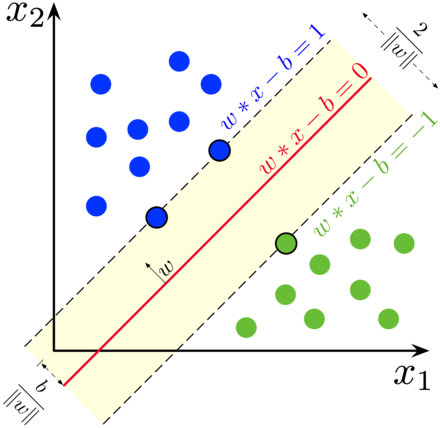

In the image above, the solid line represents the decision boundary (hyperplane) learned by the SVM. The dashed lines represent the margins, which are parallel to the decision boundary and pass through the support vectors.

##### Let's checkout the roles of the support vectors in SVM:

1. **Defining the decision boundary:** The decision boundary of the SVM is determined by the support vectors. These are the data points that are closest to the decision boundary and contribute to its position and orientation.

2. **Determining the margin:** The margin of the SVM is the distance between the decision boundary and the closest data points from each class (i.e., the support vectors). Maximizing this margin is the key objective of SVM training. In the image, the margin is represented by the distance between the solid line (decision boundary) and the dashed lines (margins).

3. **Generalization:** Support vectors are crucial for the generalization ability of the SVM. Since the decision boundary depends only on these points, the SVM is less influenced by outliers or noise in the dataset, leading to better generalization performance.

In summary, support vectors play a central role in SVMs by defining the decision boundary, determining the margin, and enhancing the model's generalization ability. They are the critical elements that enable SVMs to achieve high performance in classification tasks.

## Q5. Illustrate with examples and graphs of Hyperplane, Marginal plane, Soft margin and Hard margin in SVM?

Let's illustrate the concepts of Hyperplane, Marginal plane, Soft margin, and Hard margin using a simple example with synthetic data in a two-dimensional feature space. We'll create plots to visualize these concepts.

1. **Hyperplane:** The decision boundary that separates the data points of different classes.
2. **Marginal plane:** The planes parallel to the hyperplane that pass through the support vectors.
3. **Soft margin:** A margin that allows for some misclassification of data points.
4. **Hard margin:** A margin that does not allow any misclassification, but might not always be feasible or optimal, especially for noisy data.

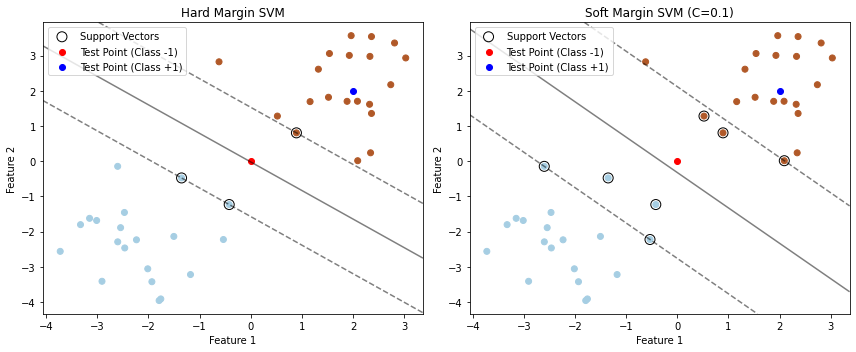

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

np.random.seed(42)
X = np.r_[np.random.randn(20, 2) - [2, 2], np.random.randn(20, 2) + [2, 2]]
y = [-1] * 20 + [1] * 20

# Fit SVM models
clf_hard = svm.SVC(kernel='linear', C=1e10)  # Hard margin
clf_soft = svm.SVC(kernel='linear', C=0.1)   # Soft margin
clf_hard.fit(X, y)
clf_soft.fit(X, y)

# Plotting
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.scatter(clf_hard.support_vectors_[:, 0], clf_hard.support_vectors_[:, 1], s=100,
            facecolors='none', edgecolors='k', label='Support Vectors')
plt.scatter([0], [0], color='red', marker='o', label='Test Point (Class -1)')
plt.scatter([2], [2], color='blue', marker='o', label='Test Point (Class +1)')
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),
                     np.linspace(ylim[0], ylim[1], 50))
Z = clf_hard.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
            linestyles=['--', '-', '--'])
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Hard Margin SVM')
plt.legend()

# Soft margin SVM
plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.scatter(clf_soft.support_vectors_[:, 0], clf_soft.support_vectors_[:, 1], s=100,
            facecolors='none', edgecolors='k', label='Support Vectors')
plt.scatter([0], [0], color='red', marker='o', label='Test Point (Class -1)')
plt.scatter([2], [2], color='blue', marker='o', label='Test Point (Class +1)')
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),
                     np.linspace(ylim[0], ylim[1], 50))
Z = clf_soft.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
            linestyles=['--', '-', '--'])
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Soft Margin SVM (C=0.1)')
plt.legend()

plt.tight_layout()
plt.show()

This code generates synthetic data, fits SVM models with hard and soft margins, and visualizes the decision boundaries, margins, and support vectors.

In the plots:

- The colored points represent the training data, with different colors indicating different classes.
- The black lines represent the decision boundaries (hyperplanes).
- The dashed lines parallel to the decision boundary represent the margins (marginal planes).
- The unfilled circles represent the support vectors.

In the hard margin SVM plot, we will observe a tighter decision boundary with fewer support vectors, whereas in the soft margin SVM plot, the decision boundary has more support vectors and allows for some misclassification.

## Q6. SVM Implementation through Iris dataset.

### - Load the iris dataset from the scikit-learn library and split it into a training set and a testing set
### - Train a linear SVM classifier on the training set and predict the labels for the testing set
### - Compute the accuracy of the model on the testing set
### - Plot the decision boundaries of the trained model using two of the features
### - Try different values of the regularisation parameter C and see how it affects the performance of the model.

##### Loading the IRIS dataset

In [28]:
import sklearn.datasets as dataset
import pandas as pd

data = dataset.load_iris()
df = pd.DataFrame(data=data.data, columns=data.feature_names)
df["target"] = data.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [29]:
X = df.iloc[:, :4]
Y = df["target"]

##### Fitting a Linear SVM Classifier

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)
print(f"Train shape:{X_train.shape},{y_train.shape}")
print(f"Test shape:{X_test.shape},{y_test.shape}")

Train shape:(112, 4),(112,)
Test shape:(38, 4),(38,)


In [33]:
from sklearn.svm import SVC

classifier = SVC(kernel="linear", C= 1.0)
classifier.fit(X_train,y_train)

SVC(kernel='linear')

##### Computing the accuracy score of the model

In [34]:
from sklearn.metrics import accuracy_score

y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy score: {accuracy}")

Accuracy score: 1.0


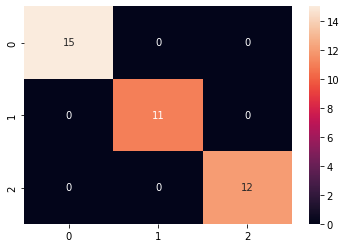

In [36]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cf = confusion_matrix(y_test,y_pred)
sns.heatmap(cf,annot=True)
plt.show()

##### Plotting the decision boundary

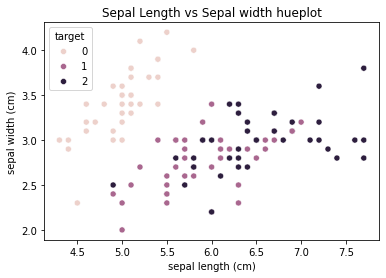

In [39]:
import seaborn as sns

df_train = pd.concat([X_train,y_train],axis=1)
sns.scatterplot(data = df_train, x = 'sepal length (cm)',y='sepal width (cm)',hue='target')
plt.title('Sepal Length vs Sepal width hueplot')
plt.show()

##### Try different values of regularisation parameter C and see how its performance affects the performance of model

In [49]:
C = np.linspace(start=0.01, stop=10, num=20)
C

array([ 0.01      ,  0.53578947,  1.06157895,  1.58736842,  2.11315789,
        2.63894737,  3.16473684,  3.69052632,  4.21631579,  4.74210526,
        5.26789474,  5.79368421,  6.31947368,  6.84526316,  7.37105263,
        7.89684211,  8.42263158,  8.94842105,  9.47421053, 10.        ])

In [50]:
from sklearn.metrics import classification_report
acc = []
for i in C:
    model = SVC(kernel='linear', C=i)
    model.fit(X_train,y_train.values.flatten())
    y_pred = model.predict(X_test)
    acc.append(accuracy_score(y_test,y_pred))
    print(f'C Value : {i}\n')
    print(classification_report(y_test,y_pred))
    print('\n======================================================================\n')

C Value : 0.01

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.92      1.00      0.96        11
           2       1.00      0.92      0.96        12

    accuracy                           0.97        38
   macro avg       0.97      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38



C Value : 0.5357894736842106

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



C Value : 1.0615789473684212

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00      

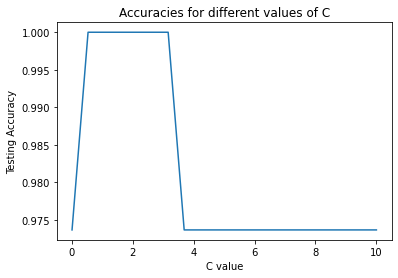

In [51]:
plt.plot(C, acc)
plt.xlabel('C value')
plt.ylabel('Testing Accuracy')
plt.title('Accuracies for different values of C')
plt.show()